In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

In [8]:
from torch_geometric.datasets import TUDataset
tu_data = TUDataset(root="tutorial1",name= "PROTEINS")
# https://pytorch-geometrimport networkx as nx
t1 = tu_data[1]
t1.x

Processing...
Done!


tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]])

In [11]:
len(tu_data)

1113

In [9]:
dataset = t1
print(f'Dataset: {dataset}')
print('----------------')
print(f'Number of graphs: {len(dataset)}')

Dataset: Data(edge_index=[2, 92], x=[27, 3], y=[1])
----------------
Number of graphs: 3


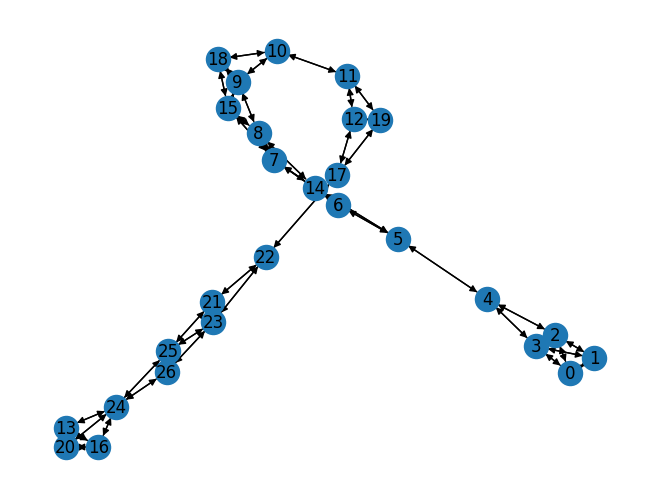

In [28]:
G1 = to_networkx(t1)
nx.draw(G1, with_labels = True)
plt.show()

### Protein Graph 2

In [18]:
t2 = tu_data[2]
dataset2 = t2
print(f'Dataset2: {dataset2}')
print('----------------')
print(f'Number of graphs: {len(dataset2)}')

Dataset2: Data(edge_index=[2, 34], x=[10, 3], y=[1])
----------------
Number of graphs: 3


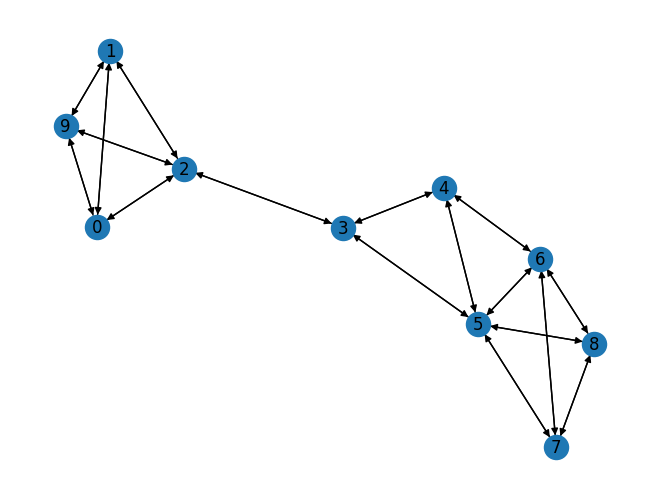

In [29]:
G2 = to_networkx(t2)
nx.draw(G2, with_labels = True)
plt.show()

In [31]:
G1.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26))

In [32]:
G2.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

### Intersection Kernel
##### function computes the similarity between the two graphs based on the number of common nodes they share
##### The similarity is calculated as the size of the intersection of nodes divided by the minimum of the sizes of the two graphs. The resulting value ranges from 0 (no common nodes) to 1 (graphs are identical)

In [30]:
def intersection_kernel(graph1, graph2):
    # Get the set of nodes for each graph
    nodes1 = set(graph1.nodes())
    nodes2 = set(graph2.nodes())

    # intersection of nodes
    common_nodes = nodes1.intersection(nodes2)

    # graph kernel similarity
    similarity = len(common_nodes) / min(len(nodes1), len(nodes2))

    return similarity


# Compute Intersection Graph Kernel
kernel_similarity = intersection_graph_kernel(G2, G1)

# Print the kernel similarity
print("Intersection Kernel Similarity:", kernel_similarity)

Intersection Kernel Similarity: 1.0


### Gaussian Kernel
####  Using Radial Basis Function (RBF) kernel


In [51]:
import networkx as nx
import numpy as np
from sklearn.metrics.pairwise import rbf_kernel

def graph_feature_vector(graph):
    '''
     This function converts each graph into a feature vector based on node degrees.
    '''
    # Calculate the node degrees as features
    degrees = dict(graph.degree())
    features = np.array(list(degrees.values())).reshape(-1, 1)
    return features

def gaussian_similarity_kernel(graph1, graph2, sigma):
    '''
    The gaussian_similarity_kernel function computes the Gaussian similarity 
    kernel using the Radial Basis Function (RBF) kernel (rbf_kernel from scikit-learn).
    '''
    # Get feature vectors for each graph
    features1 = graph_feature_vector(graph1)
    features2 = graph_feature_vector(graph2)

    # Compute Gaussian similarity kernel
    similarity_matrix = rbf_kernel(features1, features2, gamma=1/(2*sigma**2))

    # Sum over the matrix to get a single similarity value
    similarity = np.sum(similarity_matrix)

    return similarity

sigma = 1.0

# Gaussian Similarity Kernel
kernel_similarity = gaussian_similarity_kernel(G1, G2, sigma)

# kernel similarity
print("Gaussian Kernel Similarity:", kernel_similarity)


Gaussian Similarity Kernel Similarity: 152.62426169262383
